# 졸음운전사고에 대한 사망자수

### 1. 데이터 확인

In [21]:
import pandas as pd

In [22]:
#교통사고 데이터 로드
df_road = pd.read_csv("졸음운전도로별.csv", encoding='CP949', header=0)

In [23]:
# 데이터 확인
display(df_road)

,년도,구분,사고(건),사망(명),부상(명)
0,2014,일반국도,407,30,773
1,2014,지방도,345,19,688
2,2014,특별광역시도,685,17,1356
3,2014,시도,635,17,1177
4,2014,군도,119,8,221
5,2014,고속국도,183,38,377
6,2014,기타,52,1,87
7,2015,일반국도,443,33,975
8,2015,지방도,357,17,721
9,2015,특별광역시도,756,7,1565


### 2. 데이터 전처리

In [24]:
# 데이터 컬럼 수정
df_road = df_road[['구분', '사고(건)', '사망(명)', '부상(명)']]
df_road.columns = ['구분', '사고건수', '사망자수', '부상자수']
display(df_road)

,구분,사고건수,사망자수,부상자수
0,일반국도,407,30,773
1,지방도,345,19,688
2,특별광역시도,685,17,1356
3,시도,635,17,1177
4,군도,119,8,221
5,고속국도,183,38,377
6,기타,52,1,87
7,일반국도,443,33,975
8,지방도,357,17,721
9,특별광역시도,756,7,1565


In [25]:
# groupby 전처리
ROAD_group = df_road.groupby('구분')
road = []
total = []
die = []
sick = []
for key, group in ROAD_group :
    road.append(key)
    total.append(group['사고건수'].sum())
    die.append(group['사망자수'].sum())
    sick.append(group['부상자수'].sum())
df_road = pd.DataFrame({'구분':road, '사고건수':total, '사망자수':die, '부상자수':sick})

In [26]:
display(df_road)

,구분,사고건수,사망자수,부상자수
0,고속국도,612,81,1389
1,군도,344,24,592
2,기타,128,4,206
3,시도,2056,55,3914
4,일반국도,1319,86,2737
5,지방도,1012,54,2003
6,특별광역시도,2089,32,4262


### 3. 시각화

In [27]:
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc
font_path = "C:/KHR/PYDATAexam/data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

0     612
1     344
2     128
3    2056
4    1319
5    1012
6    2089
Name: 사고건수, dtype: int64


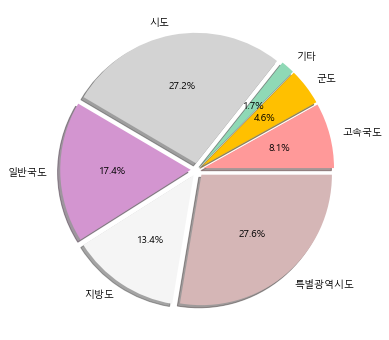

In [31]:
# 교통사고와 졸음운전 피해본 사람의 비율
ratio = df_road['사고건수']
labels = df_road['구분']
print(ratio)
# 전체교통사고건수 : 졸음운전사고건수 - 파이 그래프
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05 ]
colors = ['#ff9999', '#ffc000', '#8fd9b6', 'lightgray', '#d395d0', 'whitesmoke', '#d5b6b6']

plt.figure(figsize=(10,6))
plt.pie(ratio, labels=labels, autopct='%.1f%%',
        explode=explode, colors=colors, shadow=True)
plt.savefig("도로별졸음운전사고수.png")
plt.show()